Leitura dos dados no documento excel `Acoustic_Extinguisher_Fire_Dataset.xlsx`.

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_excel('./Acoustic_Extinguisher_Fire_Dataset/Acoustic_Extinguisher_Fire_Dataset.xlsx')
df.head()

,SIZE,FUEL,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
0,1,gasoline,10,96,0.0,75,0
1,1,gasoline,10,96,0.0,72,1
2,1,gasoline,10,96,2.6,70,1
3,1,gasoline,10,96,3.2,68,1
4,1,gasoline,10,109,4.5,67,1


Relação entre os dados: `DISTANCE`, `SIZE` e `AIRFLOW`

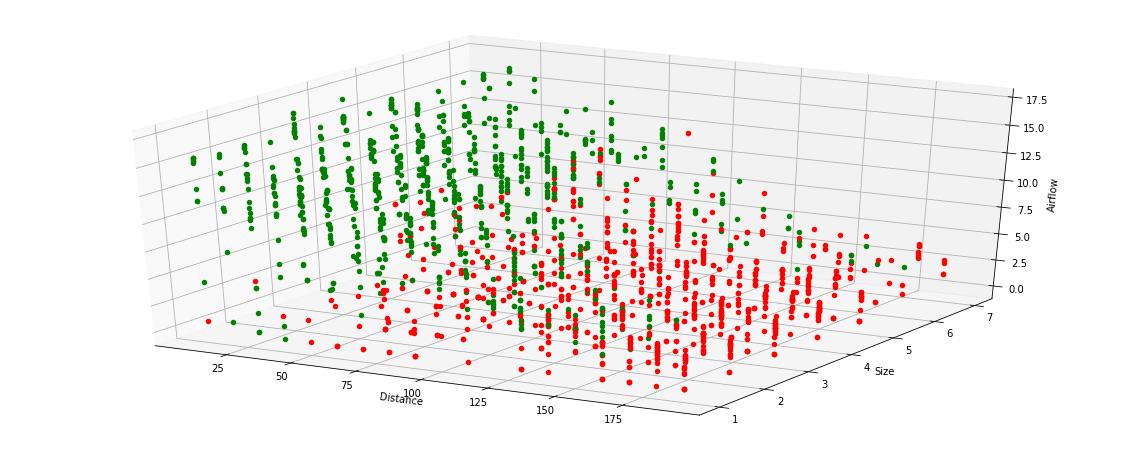

In [3]:
import matplotlib.pyplot as plt

samples = df.sample(frac=0.1, replace=True)
colors = ['red', 'green']

fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(projection='3d')

for index, row in samples.iterrows():
    ax.scatter(row['DISTANCE'], row['SIZE'], row['AIRFLOW'], c=colors[df['STATUS'][index]])

ax.set_xlabel('Distance')
ax.set_ylabel('Size')
ax.set_zlabel('Airflow')

plt.show()

Relação entre os dados da onda: `DESIBEL`, `FREQUENCY` e `AIRFLOW`

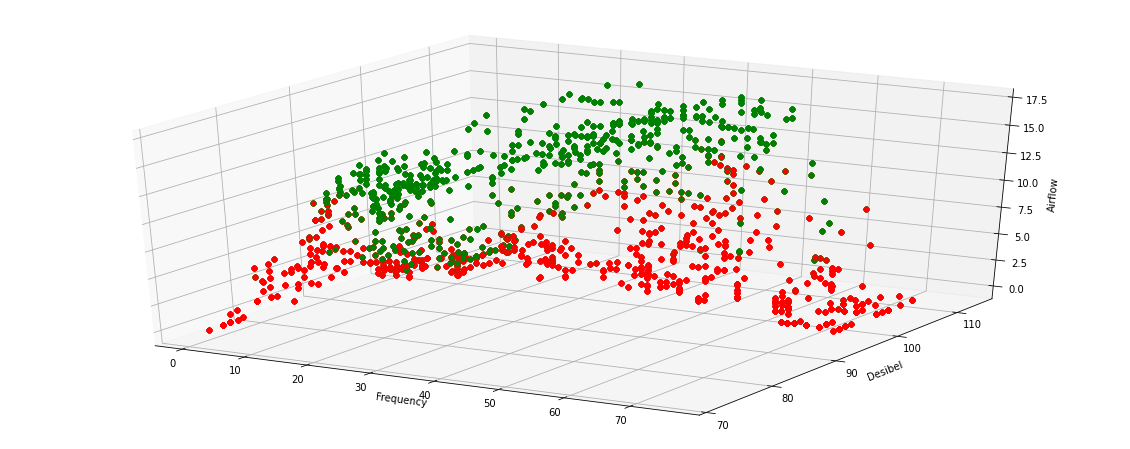

In [4]:
mode = df['DISTANCE'].mode()

df_fixed_distance = df[df['DISTANCE'].isin(mode)]

fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(projection='3d')

for index, row in df_fixed_distance.iterrows():
    ax.scatter(row['FREQUENCY'], row['DESIBEL'], row['AIRFLOW'], c=colors[df['STATUS'][index]])

ax.set_xlabel('Frequency')
ax.set_ylabel('Desibel')
ax.set_zlabel('Airflow')

plt.show()

Análise dos dados: Comparação entre os tipos de combustível em relação a distância e fluxo de ar

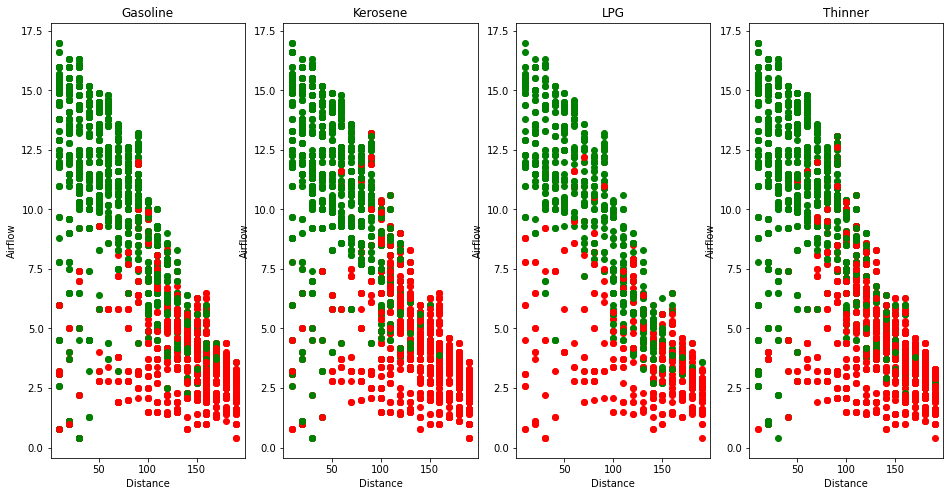

In [5]:
dummy_vars = pd.get_dummies(df['FUEL'])
df_dummies = pd.concat([dummy_vars, df.drop('FUEL', axis=1)], axis = 1, sort=False)

df_dummies = df_dummies.loc[df_dummies['AIRFLOW'] != 0]
percent = 0.8

samples_gasoline = df_dummies.loc[df_dummies['gasoline'] == 1,:].sample(frac=percent, replace=True)
samples_kerosene = df_dummies.loc[df_dummies['kerosene'] == 1,:].sample(frac=percent, replace=True)
samples_lpg = df_dummies.loc[df_dummies['lpg'] == 1,:].sample(frac=percent, replace=True)
samples_thinner = df_dummies.loc[df_dummies['thinner'] == 1,:].sample(frac=percent, replace=True)

plt.figure(figsize=(16, 8))
colors = ['red','green']

plt.subplot(1, 4, 1)
plt.title("Gasoline")
for index, row in samples_gasoline.iterrows():
    plt.scatter(row['DISTANCE'], row['AIRFLOW'], c=colors[df['STATUS'][index]])
plt.xlabel('Distance')
plt.ylabel('Airflow')

plt.subplot(1, 4, 2)
plt.title("Kerosene")
for index, row in samples_kerosene.iterrows():
    plt.scatter(row['DISTANCE'], row['AIRFLOW'], c=colors[df['STATUS'][index]])
plt.xlabel('Distance')
plt.ylabel('Airflow')

plt.subplot(1, 4, 3)
plt.title("LPG")
for index, row in samples_lpg.iterrows():
    plt.scatter(row['DISTANCE'], row['AIRFLOW'], c=colors[df['STATUS'][index]])
plt.xlabel('Distance')
plt.ylabel('Airflow')

plt.subplot(1, 4, 4)
plt.title("Thinner")
for index, row in samples_thinner.iterrows():
    plt.scatter(row['DISTANCE'], row['AIRFLOW'], c=colors[df['STATUS'][index]])
plt.xlabel('Distance')
plt.ylabel('Airflow')

plt.show()

Detecção e remoção dos outliers no atributo **`AIRFLOW`** pela distribuição dos dados.

In [2]:
desvp = df['AIRFLOW'].std()
media = df['AIRFLOW'].mean()

print("media = %.2f, desvio padrao = %.2f" % (media, desvp))

# apenas outliers segundo std
df_out_airflow = df[(df['AIRFLOW'] < media-(desvp*2)) | (df['AIRFLOW'] > media+(desvp*2))]
print("Outliers:", len(df_out_airflow))

# apenas inliers segundo std
df_in_airflow = df[(df['AIRFLOW'] >= media-(desvp*2)) & (df['AIRFLOW'] <= media+(desvp*2))]
print("Inliers:", len(df_in_airflow))

#removendo outliers
df = df_in_airflow

media = 6.98, desvio padrao = 4.74
Outliers: 34
Inliers: 17408


Detecção e remoção dos outliers no atributo **`DESIBEL`** pela distribuição dos dados.

In [3]:
desvp = df['DESIBEL'].std()
media = df['DESIBEL'].mean()

print("media = %.2f, desvio padrao = %.2f" % (media, desvp))

# apenas outliers segundo std
df_out_desibel = df[(df['DESIBEL'] < media-(desvp*2)) | (df['DESIBEL'] > media+(desvp*2))]
print("Outliers:", len(df_out_desibel))

# apenas inliers segundo std
df_in_desibel = df[(df['DESIBEL'] >= media-(desvp*2)) & (df['DESIBEL'] <= media+(desvp*2))]
print("Inliers:", len(df_in_desibel))

#removendo outliers
df = df_in_desibel

media = 96.35, desvio padrao = 8.15
Outliers: 595
Inliers: 16813


Verificação de dados faltando em todas as colunas.

In [4]:
df.isna().sum()

SIZE         0
FUEL         0
DISTANCE     0
DESIBEL      0
AIRFLOW      0
FREQUENCY    0
STATUS       0
dtype: int64

Verficação de dados nulos em todas as colunas

In [5]:
df.isnull().sum()

SIZE         0
FUEL         0
DISTANCE     0
DESIBEL      0
AIRFLOW      0
FREQUENCY    0
STATUS       0
dtype: int64

Dados após o tratamento de outliers.

In [6]:
df

,SIZE,FUEL,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
0,1,gasoline,10,96,0.0,75,0
1,1,gasoline,10,96,0.0,72,1
2,1,gasoline,10,96,2.6,70,1
3,1,gasoline,10,96,3.2,68,1
4,1,gasoline,10,109,4.5,67,1
...,...,...,...,...,...,...,...
17434,7,lpg,190,91,1.9,8,0
17435,7,lpg,190,91,1.6,7,0
17436,7,lpg,190,87,2.5,6,0
17437,7,lpg,190,86,2.2,5,0


Convertemos os atributos categóricos **FUEL** em numéricos usando a técnica one-hot encoding através do método `get_dummies` no `pandas`.

Como resultado, os quatro tipos de combustíveis presentes (`gasoline`, `kerosene`, `lpg` e `thinner`) foram separados em 4 atributos com valores 0 ou 1.

In [7]:
dummy_vars = pd.get_dummies(df['FUEL'])
df_dummies = pd.concat([dummy_vars, df.drop('FUEL', axis=1)], axis = 1, sort=False)
df_dummies

,gasoline,kerosene,lpg,thinner,SIZE,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
0,1,0,0,0,1,10,96,0.0,75,0
1,1,0,0,0,1,10,96,0.0,72,1
2,1,0,0,0,1,10,96,2.6,70,1
3,1,0,0,0,1,10,96,3.2,68,1
4,1,0,0,0,1,10,109,4.5,67,1
...,...,...,...,...,...,...,...,...,...,...
17434,0,0,1,0,7,190,91,1.9,8,0
17435,0,0,1,0,7,190,91,1.6,7,0
17436,0,0,1,0,7,190,87,2.5,6,0
17437,0,0,1,0,7,190,86,2.2,5,0


Normalização dos dados.

In [8]:
print("Normalização Min-Max [0,1]")
df_norm = df_dummies
for column in df_norm:
    df_norm[column] = (df_norm[column] - df_norm[column].min()) / (df_norm[column].max()-df_norm[column].min())
df_norm

Normalização Min-Max [0,1]


,gasoline,kerosene,lpg,thinner,SIZE,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
0,1.0,0.0,0.0,0.0,0.0,0.0,0.466667,0.000000,1.000000,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.466667,0.000000,0.959459,1.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.466667,0.159509,0.932432,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.466667,0.196319,0.905405,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.900000,0.276074,0.891892,1.0
...,...,...,...,...,...,...,...,...,...,...
17434,0.0,0.0,1.0,0.0,1.0,1.0,0.300000,0.116564,0.094595,0.0
17435,0.0,0.0,1.0,0.0,1.0,1.0,0.300000,0.098160,0.081081,0.0
17436,0.0,0.0,1.0,0.0,1.0,1.0,0.166667,0.153374,0.067568,0.0
17437,0.0,0.0,1.0,0.0,1.0,1.0,0.133333,0.134969,0.054054,0.0


Determinação dos conjuntos de dados

In [9]:
y = df_norm.iloc[:,-1:]
y.head()

,STATUS
0,0.0
1,1.0
2,1.0
3,1.0
4,1.0


In [10]:
X = df_norm.iloc[:,:-1]
X.head()

,gasoline,kerosene,lpg,thinner,SIZE,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY
0,1.0,0.0,0.0,0.0,0.0,0.0,0.466667,0.000000,1.000000
1,1.0,0.0,0.0,0.0,0.0,0.0,0.466667,0.000000,0.959459
2,1.0,0.0,0.0,0.0,0.0,0.0,0.466667,0.159509,0.932432
3,1.0,0.0,0.0,0.0,0.0,0.0,0.466667,0.196319,0.905405
4,1.0,0.0,0.0,0.0,0.0,0.0,0.900000,0.276074,0.891892


Separação do conjunto em dados de treino e teste

In [11]:
# porcentagem de separação dos conjuntos teste e treino
percent=0.2 # 20% teste 80% treino

X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=percent, random_state=42)

Modelo de classificação KNN. ( Com Cross-Validation )

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score

#Definição do cross-validation:
n_folds = 5
kf = KFold(n_splits=n_folds, shuffle=True)

knn = KNeighborsClassifier(n_neighbors=1)
score = cross_val_score(knn, X, np.ravel(y), cv=kf)
print('Acurácia com 1 K-NN: %0.4f +/- %0.4f' % (score.mean(), score.std()))

knn = KNeighborsClassifier(n_neighbors=3)
score = cross_val_score(knn, X, np.ravel(y), cv=kf)
print('Acurácia com 3 K-NN: %0.4f +/- %0.4f' % (score.mean(), score.std()))

knn = KNeighborsClassifier(n_neighbors=5)
score = cross_val_score(knn, X, np.ravel(y), cv=kf)
print('Acurácia com 5 K-NN: %0.4f +/- %0.4f' % (score.mean(), score.std()))

knn = KNeighborsClassifier(n_neighbors=7)
score = cross_val_score(knn, X, np.ravel(y), cv=kf)
print('Acurácia com 7 K-NN: %0.4f +/- %0.4f' % (score.mean(), score.std()))

knn = KNeighborsClassifier(n_neighbors=11)
score = cross_val_score(knn, X, np.ravel(y), cv=kf)
print('Acurácia com 11 K-NN: %0.4f +/- %0.4f' % (score.mean(), score.std()))

Acurácia com 1 K-NN: 0.9629 +/- 0.0021
Acurácia com 3 K-NN: 0.9597 +/- 0.0044
Acurácia com 5 K-NN: 0.9616 +/- 0.0027
Acurácia com 7 K-NN: 0.9606 +/- 0.0030
Acurácia com 11 K-NN: 0.9606 +/- 0.0019


KNN Usando Holdout

In [17]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, np.ravel(y_train))
y_pred = knn.predict(X_test)
print('Acurácia com 1 K-NN: %0.4f' % (accuracy_score(y_test, y_pred)))

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, np.ravel(y_train))
y_pred = knn.predict(X_test)
print('Acurácia com 3 K-NN: %0.4f' % (accuracy_score(y_test, y_pred)))

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, np.ravel(y_train))
y_pred = knn.predict(X_test)
print('Acurácia com 5 K-NN: %0.4f' % (accuracy_score(y_test, y_pred)))

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, np.ravel(y_train))
y_pred = knn.predict(X_test)
print('Acurácia com 7 K-NN: %0.4f' % (accuracy_score(y_test, y_pred)))

knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train, np.ravel(y_train))
y_pred = knn.predict(X_test)
print('Acurácia com 11 K-NN: %0.4f' % (accuracy_score(y_test, y_pred)))

Acurácia com 1 K-NN: 0.9658
Acurácia com 3 K-NN: 0.9616
Acurácia com 5 K-NN: 0.9619
Acurácia com 7 K-NN: 0.9649
Acurácia com 11 K-NN: 0.9634


Regressão Múltipla

In [18]:

df_apagados = df_norm.loc[df_dummies['STATUS'] == 1,:]
df_apagados


,gasoline,kerosene,lpg,thinner,SIZE,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
1,1.0,0.0,0.0,0.0,0.0,0.000000,0.466667,0.000000,0.959459,1.0
2,1.0,0.0,0.0,0.0,0.0,0.000000,0.466667,0.159509,0.932432,1.0
3,1.0,0.0,0.0,0.0,0.0,0.000000,0.466667,0.196319,0.905405,1.0
4,1.0,0.0,0.0,0.0,0.0,0.000000,0.900000,0.276074,0.891892,1.0
5,1.0,0.0,0.0,0.0,0.0,0.000000,0.900000,0.478528,0.878378,1.0
...,...,...,...,...,...,...,...,...,...,...
17262,0.0,0.0,1.0,0.0,1.0,0.833333,0.366667,0.239264,0.229730,1.0
17263,0.0,0.0,1.0,0.0,1.0,0.833333,0.166667,0.245399,0.216216,1.0
17264,0.0,0.0,1.0,0.0,1.0,0.833333,0.333333,0.208589,0.202703,1.0
17265,0.0,0.0,1.0,0.0,1.0,0.833333,0.266667,0.269939,0.189189,1.0


In [19]:
import sklearn.linear_model
from sklearn.metrics import mean_squared_error, r2_score


X = df_apagados.loc[:, (df_apagados.columns != 'DISTANCE') & (df_apagados.columns != 'STATUS')]
y = df_apagados[['DISTANCE']]

X_train, y_train = X, y

regr = sklearn.linear_model.LinearRegression()
regr.fit(X_train, y_train)

#Com todos os atributos
y_pred = regr.predict(X)
print("Número de amostras: %d" % X.shape[0])
print("Erro Médio Quadrático: %.2f" % mean_squared_error(y, y_pred))
print("R Score: %.2f" % r2_score(y, y_pred))

#Retirando os combustíveis
X = X.loc[:,(X.columns != 'gasoline')&(X.columns != 'kerosene')&(X.columns != 'lpg')&(X.columns != 'thinner')]
X_train, y_train = X, y
regr.fit(X_train, y_train)
y_pred = regr.predict(X)
print("\nNúmero de amostras: %d" % X.shape[0])
print("Erro Médio Quadrático: %.2f" % mean_squared_error(y, y_pred))
print("R Score: %.2f" % r2_score(y, y_pred))

#Retirando SIZE
X = X.loc[:,(X.columns != 'SIZE')]
X_train, y_train = X, y
regr.fit(X_train, y_train)
y_pred = regr.predict(X)
print("\nNúmero de amostras: %d" % X.shape[0])
print("Erro Médio Quadrático: %.2f" % mean_squared_error(y, y_pred))
print("R Score: %.2f" % r2_score(y, y_pred))

Número de amostras: 8592
Erro Médio Quadrático: 0.02
R Score: 0.54

Número de amostras: 8592
Erro Médio Quadrático: 0.02
R Score: 0.53

Número de amostras: 8592
Erro Médio Quadrático: 0.02
R Score: 0.53


Teste algoritmo novo

In [42]:
import math
from collections import defaultdict

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn import datasets

In [14]:
class AlgebraicHypothesis:
    """
    Symbolic algebraic hypothesis supporting adding and multiplication.
    """
    def __init__(self):
        self.symbol_weights = defaultdict(int)
        self.symbol_evaluation_scheme = {}
        self.train_cache = {}

    def evaluate(self, data_x, cache=False):
        """
        Evaluate hypothesis against input data.
        :param data_x: numpy array sized accordingly to evaluation scheme members.
        :param cache: training time cache indicator.
        :return: numpy array.
        """
        result = np.zeros(len(data_x))
        for symbol, weight in self.symbol_weights.items():
            if symbol in self.train_cache:
                result += weight * self.train_cache[symbol]
            else:
                eval_result = self.symbol_evaluation_scheme[symbol].predict(data_x)
                if cache:
                    self.train_cache[symbol] = eval_result
                result += weight * eval_result
        return result

    def add_symbol(self, symbol, weight, evaluation_scheme):
        """
        Add symbol to algebraic expression.
        :param symbol: identifying symbol (str).
        :param weight: symbol weight (float).
        :param evaluation_scheme: numpy predictor.
        """
        self.symbol_weights[symbol] = weight
        self.symbol_evaluation_scheme[symbol] = evaluation_scheme

    def __add__(self, other):
        new_expression = AlgebraicHypothesis()
        for symbol, weight in self.symbol_weights.items():
            new_expression.symbol_weights[symbol] += weight
            new_expression.symbol_evaluation_scheme[symbol] = self.symbol_evaluation_scheme[symbol]
        for symbol, weight in other.symbol_weights.items():
            new_expression.symbol_weights[symbol] += weight
            new_expression.symbol_evaluation_scheme[symbol] = other.symbol_evaluation_scheme[symbol]
        return new_expression

    def __mul__(self, other):
        for symbol in self.symbol_weights.keys():
            self.symbol_weights[symbol] *= other
        return self

    def __str__(self):
        result = ["Algebraic hypothesis:"]
        for symbol, weight in self.symbol_weights.items():
            result.append(f"{symbol} * {weight} | {self.symbol_evaluation_scheme[symbol]}")
        return "\n".join(result)

    def clear_cache(self):
        """
        Clear train time result cache.
        """
        self.train_cache = {}

In [15]:
class MeanPredictor:
    """
    Mean predictor class, which returns precomputed mean constant.
    """
    def __init__(self):
        self.mean = 0

    def fit(self, y):
        """
        Fit mean.
        :param y: numpy array.
        """
        self.mean = np.mean(y)

    def predict(self, data_x):
        """
        Get repeated constant prediction.
        :param data_x: numpy array.
        :return: numpy array.
        """
        return np.repeat(self.mean, len(data_x))

In [16]:
class AcceleratedGradientBoosting:
    """
    Class implements additive function fitting using base-learner agnostic learning procedure.
    """
    def __init__(self, iterations=200, base_learner=DecisionTreeRegressor,
                 base_learner_params=None, shrinkage=0.9, n_classes=2):
        self.iterations = iterations
        self.base_learner = base_learner
        self.base_learner_params = base_learner_params
        self.shrinkage = shrinkage
        self.hypothesis = None
        self.n_classes = n_classes

    def fit(self, data_x, y, verbose=False):
        """
        Perform additive learning procedure.
        """
        # Initialize Nesterov learning scheme
        lambda_now = 0
        gamma = 1

        # Initialize hypothesis
        f_now = AlgebraicHypothesis()
        mp = MeanPredictor()
        mp.fit(y)
        f_now.add_symbol("Mean_start", 1.0, mp)
        g_now = AlgebraicHypothesis()
        g_now.add_symbol("Mean_start", 1.0, mp)

        # Perform boosting
        for epoch in range(self.iterations):
            if verbose:
                print(f"Epoch: {epoch + 1}")
            g_prev = g_now
            # Compute gradient
            gradient = y - g_prev.evaluate(data_x, True)
            # Fit base learner to gradient
            if self.base_learner_params:
                base_learner_part = self.base_learner(**self.base_learner_params)
            else:
                base_learner_part = self.base_learner()
            base_learner_part.fit(data_x, gradient)
            base_learner_name = f"BaseLearner {epoch}"

            # Update
            f_prev = f_now
            f_now = AlgebraicHypothesis()
            f_now.add_symbol(base_learner_name, self.shrinkage, base_learner_part)
            f_now = g_prev + f_now
            g_now = (f_now * (1 - gamma)) + (f_prev * gamma)

            # Update Nesterov scheme
            lambda_prev = lambda_now
            lambda_now = (1 + math.sqrt(1 + 4 * lambda_prev)) / 2
            gamma = (1 - lambda_prev) / lambda_now
        f_now.clear_cache()
        self.hypothesis = f_now

    def predict(self, data_x):
        """
        Get hypothesis predictions.
        :param data_x: numpy array.
        :return: prediction vector.
        """
        bins = [x + 0.5 for x in range(self.n_classes - 1)]
        return np.digitize(self.hypothesis.evaluate(data_x), bins)

In [93]:
agb_teste = AcceleratedGradientBoosting(iterations=100, n_classes=9, base_learner_params={'max_leaf_nodes': 17})

In [94]:
agb_teste.fit(X_train.to_numpy(), y_train.to_numpy().flatten())


In [95]:
predicted_values = agb_teste.predict(X_test.to_numpy())

In [96]:
accuracy_score(y_test.to_numpy().flatten(), predicted_values)

0.8700564971751412